In [1]:
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time

def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def detect_faces(f_cascade, colored_img, scaleFactor):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          

 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
 print(len(faces))

 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

 return img_copy

In [4]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml') 
#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')  

#load test image1 
test1 = cv2.imread('data/test2.jpg') 
#load test image2 
test2 = cv2.imread('data/test4.jpg')

In [ ]:
#------------HAAR----------- 
#note time before detection 
t1 = time.time()  

#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test1, 1.1)  

#note time after detection 
t2 = time.time() 
#calculate time difference 
dt1 = t2 - t1 
#print the time difference
print (dt1)

In [12]:
#------------LBP----------- 
#note time before detection 
t1 = time.time()  

#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, test1, 1.1)  

#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference
print (dt1)

8
5.890594244003296


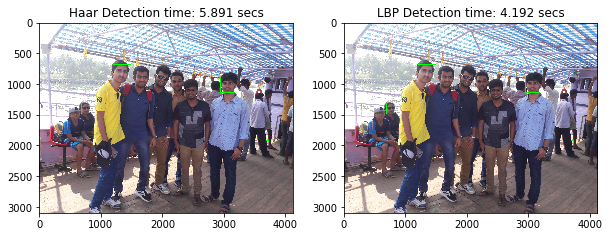

In [14]:
#----------Let's do some fancy drawing------------- 
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  

#show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convertToRGB(haar_detected_img))  

#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convertToRGB(lbp_detected_img))  

#show images 
#plt.imshow(faces_detected_img)